# Final Exam

## Question 3

Predict the best postion of players using their attributes (attacking, skill, movement, defending, power, goalkeeping and mentality).

#### 3.1 Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

#### 3.2 Loading Data

In [2]:
df = pd.read_csv('data/players_stats.csv')
df.head()

,name,photo_url,positions,age,birth_date,height,weight,football_club,national_team,overall_rating,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,DefensiveAwareness,StandingTackle,SlidingTackle
0,Lionel Andrés Messi Cuccittini,https://cdn.sofifa.com/players/158/023/20_120.png,"RW,ST,CF",32,1987/Jun/24,170,72,FC Barcelona,Argentina,94,...,68,94,48,40,94,94,75,33,37,26
1,Cristiano Ronaldo dos Santos Aveir,https://cdn.sofifa.com/players/020/801/20_120.png,"ST,LW",34,1985/Feb/5,187,83,Juventus,Portugal,93,...,78,93,63,29,95,82,85,28,32,24
2,Neymar da Silva Santos Júnior,https://cdn.sofifa.com/players/190/871/20_120.png,"LW,CAM",27,1992/Feb/5,175,68,Paris Saint-Germain,Brazil,92,...,49,85,51,36,87,90,92,35,30,29
3,Virgil van Dijk,https://cdn.sofifa.com/players/203/376/20_120.png,CB,27,1991/Jul/8,193,92,Liverpool,Netherlands,91,...,92,64,83,90,47,65,62,93,93,86
4,Jan Oblak,https://cdn.sofifa.com/players/200/389/20_120.png,GK,26,1993/Jan/7,188,87,Atlético Madrid,Slovenia,91,...,78,12,34,19,11,65,11,27,12,18


In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      19655 non-null  object 
 1   photo_url                 19655 non-null  object 
 2   positions                 19655 non-null  object 
 3   age                       19655 non-null  int64  
 4   birth_date                19655 non-null  object 
 5   height                    19655 non-null  int64  
 6   weight                    19655 non-null  int64  
 7   football_club             19655 non-null  object 
 8   national_team             913 non-null    object 
 9   overall_rating            19655 non-null  int64  
 10  potential                 19655 non-null  int64  
 11  value                     19655 non-null  float64
 12  wages                     19655 non-null  float64
 13  best_position             19655 non-null  object 
 14  best_r

#### 3.3 Cleaning Data

In [4]:
df.drop_duplicates(inplace = True)

#### 3.4 Feature Selection

In [5]:
# Include attr columns only
df_attr = df.iloc[:, np.r_[13, 23:51]]
df_attr

,best_position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,DefensiveAwareness,StandingTackle,SlidingTackle
0,RW,88,95,70,92,88,97,93,94,92,...,68,94,48,40,94,94,75,33,37,26
1,ST,84,94,89,83,87,89,81,76,77,...,78,93,63,29,95,82,85,28,32,24
2,LW,87,87,62,87,87,96,88,89,81,...,49,85,51,36,87,90,92,35,30,29
3,CB,53,52,87,79,45,70,60,70,83,...,92,64,83,90,47,65,62,93,93,86
4,GK,13,11,15,43,13,12,13,14,40,...,78,12,34,19,11,65,11,27,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,RB,42,15,42,37,25,38,32,25,30,...,41,15,40,48,41,23,31,45,45,46
19651,CDM,38,25,46,48,28,43,40,40,45,...,45,30,50,40,42,46,37,37,45,52
19652,GK,12,9,10,22,8,9,12,8,15,...,50,9,25,10,7,37,8,7,12,10
19653,CDM,38,29,42,56,30,40,38,32,53,...,60,25,56,45,37,38,40,43,45,46


In [6]:
X = df_attr.iloc[:, 1:]
X

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,DefensiveAwareness,StandingTackle,SlidingTackle
0,88,95,70,92,88,97,93,94,92,96,...,68,94,48,40,94,94,75,33,37,26
1,84,94,89,83,87,89,81,76,77,92,...,78,93,63,29,95,82,85,28,32,24
2,87,87,62,87,87,96,88,89,81,95,...,49,85,51,36,87,90,92,35,30,29
3,53,52,87,79,45,70,60,70,83,77,...,92,64,83,90,47,65,62,93,93,86
4,13,11,15,43,13,12,13,14,40,30,...,78,12,34,19,11,65,11,27,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,42,15,42,37,25,38,32,25,30,40,...,41,15,40,48,41,23,31,45,45,46
19651,38,25,46,48,28,43,40,40,45,45,...,45,30,50,40,42,46,37,37,45,52
19652,12,9,10,22,8,9,12,8,15,11,...,50,9,25,10,7,37,8,7,12,10
19653,38,29,42,56,30,40,38,32,53,45,...,60,25,56,45,37,38,40,43,45,46


In [7]:
y = df_attr.loc[:, 'best_position']
y

0         RW
1         ST
2         LW
3         CB
4         GK
        ... 
19650     RB
19651    CDM
19652     GK
19653    CDM
19654     ST
Name: best_position, Length: 19600, dtype: object

In [8]:
# Correlation
corr = X.corr()
corr

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,DefensiveAwareness,StandingTackle,SlidingTackle
Crossing,1.000000,0.669646,0.484702,0.807863,0.692824,0.864826,0.838236,0.760462,0.750271,0.841733,...,-0.013730,0.745536,0.484006,0.434392,0.795760,0.677403,0.655839,0.459960,0.439998,0.421154
Finishing,0.669646,1.000000,0.488349,0.674440,0.891685,0.830424,0.770543,0.707325,0.527976,0.791860,...,0.021811,0.888177,0.275210,0.000524,0.897883,0.699623,0.844367,0.044401,-0.003013,-0.042368
HeadingAccuracy,0.484702,0.488349,1.000000,0.667811,0.522538,0.574973,0.458322,0.415387,0.526023,0.679031,...,0.498276,0.516842,0.711005,0.553247,0.548796,0.268726,0.569700,0.590525,0.566014,0.541000
ShortPassing,0.807863,0.674440,0.667811,1.000000,0.701872,0.853364,0.775118,0.732136,0.890305,0.919490,...,0.169150,0.763936,0.638116,0.560521,0.770251,0.693896,0.687177,0.587609,0.563990,0.531526
Volleys,0.692824,0.891685,0.522538,0.701872,1.000000,0.813281,0.810992,0.751909,0.573288,0.793729,...,0.059298,0.874695,0.350662,0.093959,0.858083,0.694408,0.841972,0.131841,0.086980,0.048822
Dribbling,0.864826,0.830424,0.574973,0.853364,0.813281,1.000000,0.848817,0.758293,0.732541,0.939475,...,0.001833,0.848529,0.476159,0.319202,0.906109,0.723067,0.776850,0.361308,0.331820,0.304068
Curve,0.838236,0.770543,0.458322,0.775118,0.810992,0.848817,1.000000,0.860814,0.711039,0.828067,...,-0.010831,0.839222,0.419982,0.284775,0.822716,0.742561,0.760029,0.312571,0.280593,0.250759
FKAccuracy,0.760462,0.707325,0.415387,0.732136,0.751909,0.758293,0.860814,1.000000,0.703361,0.754957,...,-0.001249,0.806776,0.404561,0.296897,0.739830,0.709548,0.740253,0.312044,0.288957,0.257309
LongPassing,0.750271,0.527976,0.526023,0.890305,0.573288,0.732541,0.711039,0.703361,1.000000,0.790113,...,0.142150,0.672669,0.604053,0.603362,0.629719,0.691368,0.554817,0.609940,0.598577,0.574623
BallControl,0.841733,0.791860,0.679031,0.919490,0.793729,0.939475,0.828067,0.754957,0.790113,1.000000,...,0.117836,0.832768,0.578695,0.437907,0.868367,0.699692,0.773708,0.478835,0.445828,0.412439


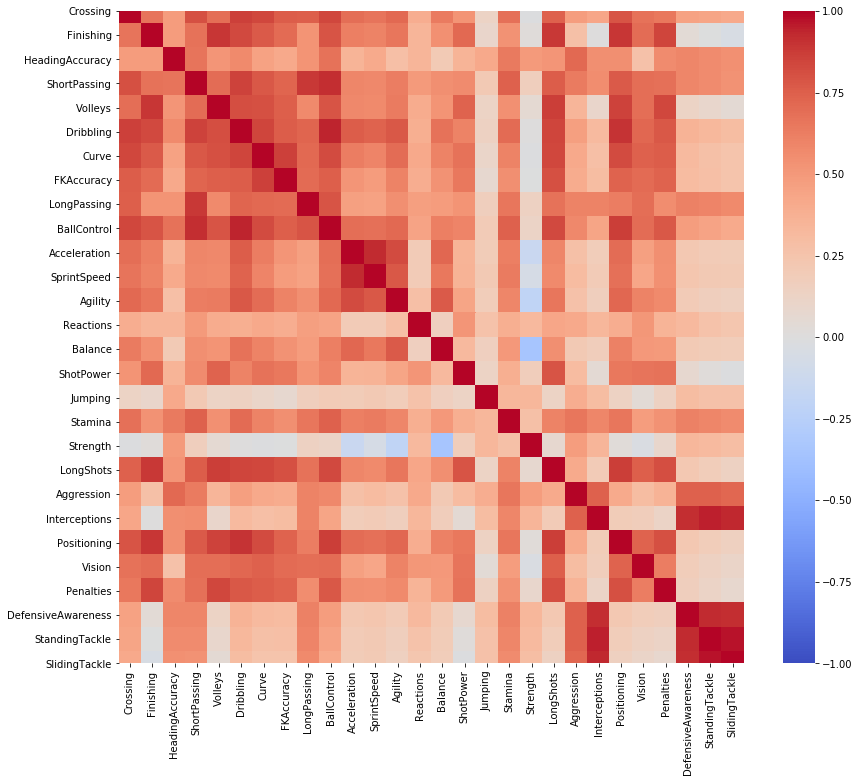

In [9]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

In [10]:
# Select features that correlation < 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]
X

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,Acceleration,...,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Vision,Penalties
0,88,95,70,92,88,97,93,94,92,91,...,95,86,68,75,68,94,48,40,94,75
1,84,94,89,83,87,89,81,76,77,88,...,71,95,95,85,78,93,63,29,82,85
2,87,87,62,87,87,96,88,89,81,94,...,84,80,61,81,49,85,51,36,90,92
3,53,52,87,79,45,70,60,70,83,74,...,53,81,90,75,92,64,83,90,65,62
4,13,11,15,43,13,12,13,14,40,43,...,49,59,78,41,78,12,34,19,65,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,42,15,42,37,25,38,32,25,30,68,...,60,30,70,53,41,15,40,48,23,31
19651,38,25,46,48,28,43,40,40,45,66,...,50,38,60,55,45,30,50,40,46,37
19652,12,9,10,22,8,9,12,8,15,25,...,30,34,40,25,50,9,25,10,37,8
19653,38,29,42,56,30,40,38,32,53,55,...,54,40,61,34,60,25,56,45,38,40


#### 3.5 Splitting Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

#### 3.6 Building Decision Tree Model

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_leaf_nodes = 15)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### 3.7 Evaluating Model

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         CAM       0.37      0.82      0.51       582
          CB       0.79      0.86      0.82       973
         CDM       0.41      0.52      0.46       383
          CF       0.00      0.00      0.00        14
          CM       0.46      0.27      0.34       312
          GK       0.99      0.98      0.99       515
          LB       0.22      0.61      0.32       231
          LM       0.00      0.00      0.00       239
          LW       0.00      0.00      0.00        40
         LWB       0.00      0.00      0.00        70
          RB       0.00      0.00      0.00       300
          RM       0.00      0.00      0.00       414
          RW       0.00      0.00      0.00        69
         RWB       0.00      0.00      0.00        60
          ST       0.80      0.85      0.82       698

    accuracy                           0.58      4900
   macro avg       0.27      0.33      0.28      4900
weighted avg       0.49   

C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5791836734693877


#### 3.8 Visualizing Decision Trees

In [15]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\FORGE-15 I7\Anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'

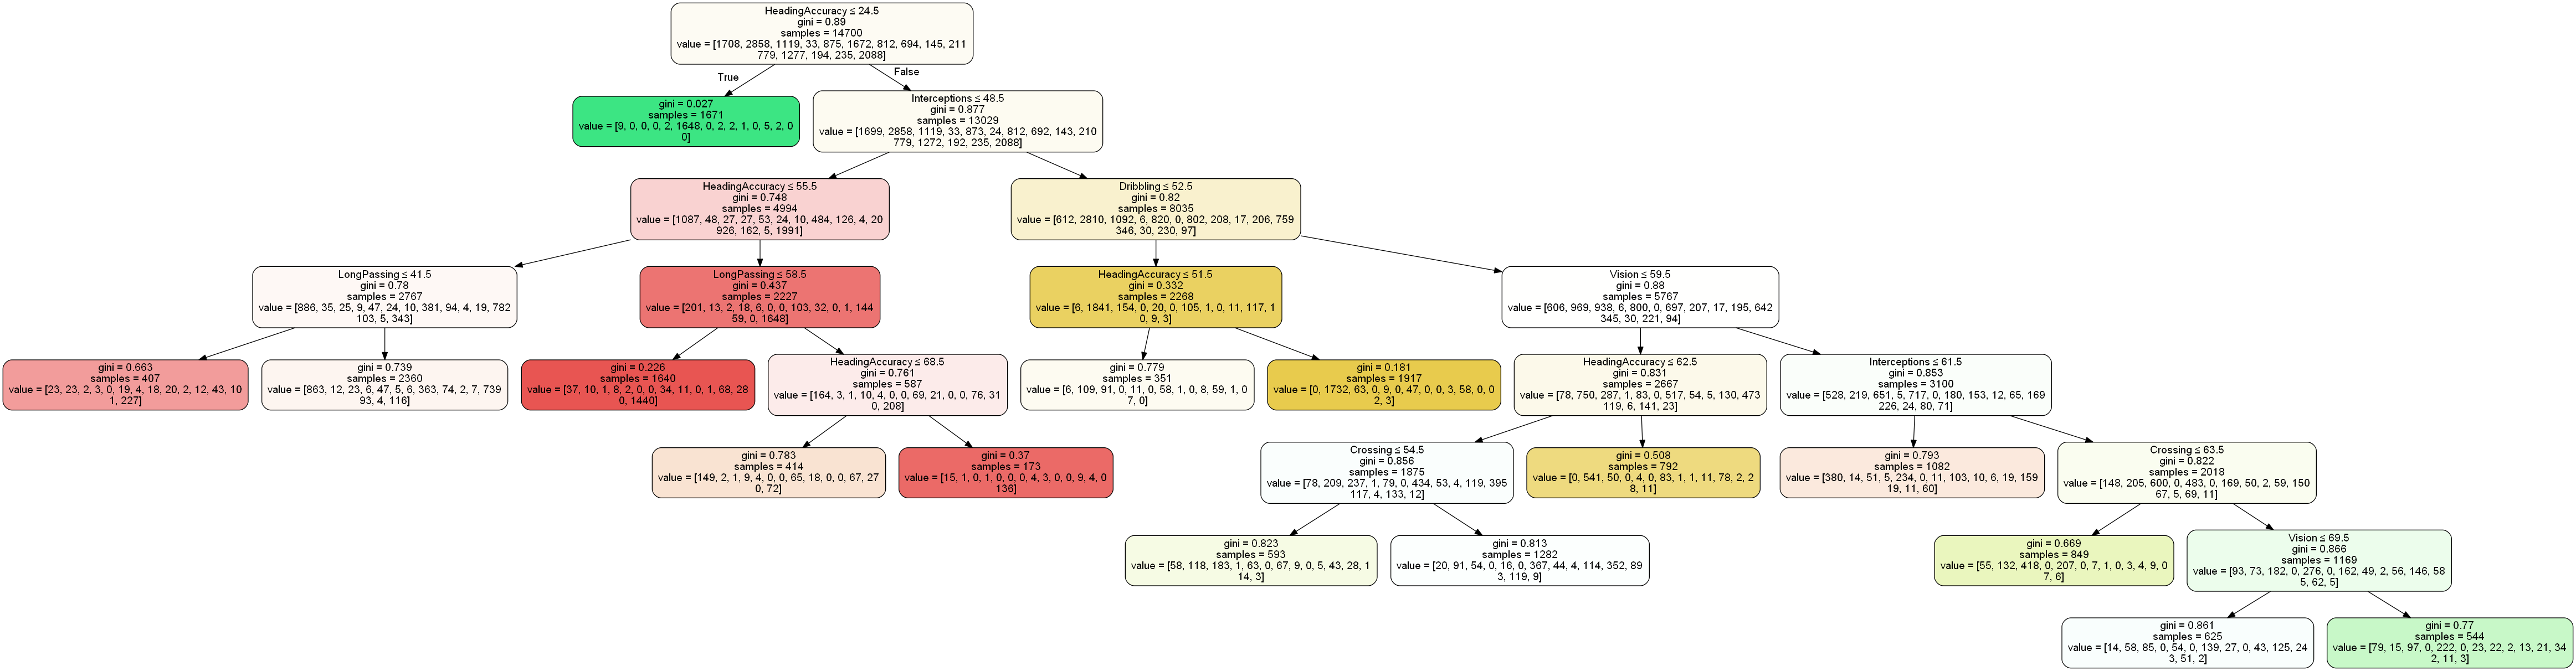

In [16]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

# Create DOT data
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = X.columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Output
graph.write_png('decision_tree.png')
Image(graph.create_png())

To show png file created in markdown:
>  *![alt text] (decision_tree.png "Decision Tree")*

## Question 4

*There will be a football player awarded as "Player of The Year" every year. The player is selected through majority votes from authorized parties. There will be five top players nominated for this award. Each party can vote up to maximun three different players in favor.*

#### 4.1 mporting required libraries

In [17]:
import random
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
# from apyori import apriori

#### 4.2 Creating a list from dataset

In [18]:
# Select top players
topPlayers = df.sort_values('overall_rating', ascending = False)['name'].head(5).tolist()
topPlayers

['Lionel Andrés Messi Cuccittini',
 'Cristiano Ronaldo dos Santos Aveir',
 'Neymar da Silva Santos Júnior',
 'Virgil van Dijk',
 'Jan Oblak']

In [19]:
voteList = []

for i in range(100):
    # Sampling with replacement
    sampling = random.sample(topPlayers, k = random.randint(1, 3))
    print("Vote: ", sampling)
    voteList.append(sampling)

Vote:  ['Virgil van Dijk']
Vote:  ['Jan Oblak']
Vote:  ['Virgil van Dijk']
Vote:  ['Jan Oblak', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Lionel Andrés Messi Cuccittini']
Vote:  ['Neymar da Silva Santos Júnior']
Vote:  ['Lionel Andrés Messi Cuccittini']
Vote:  ['Virgil van Dijk']
Vote:  ['Neymar da Silva Santos Júnior', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Neymar da Silva Santos Júnior']
Vote:  ['Neymar da Silva Santos Júnior', 'Jan Oblak', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Lionel Andrés Messi Cuccittini']
Vote:  ['Lionel Andrés Messi Cuccittini', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Neymar da Silva Santos Júnior', 'Virgil van Dijk', 'Lionel Andrés Messi Cuccittini']
Vote:  ['Virgil van Dijk', 'Lionel Andrés Messi Cuccittini']
Vote:  ['Virgil van Dijk', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Jan Oblak']
Vote:  ['Lionel Andrés Messi Cuccittini', 'Cristiano Ronaldo dos Santos Aveir']
Vote:  ['Jan Oblak']
Vote:  ['Jan Oblak', 'Lionel Andrés Me

In [20]:
voteList

[['Virgil van Dijk'],
 ['Jan Oblak'],
 ['Virgil van Dijk'],
 ['Jan Oblak', 'Cristiano Ronaldo dos Santos Aveir'],
 ['Lionel Andrés Messi Cuccittini'],
 ['Neymar da Silva Santos Júnior'],
 ['Lionel Andrés Messi Cuccittini'],
 ['Virgil van Dijk'],
 ['Neymar da Silva Santos Júnior', 'Cristiano Ronaldo dos Santos Aveir'],
 ['Neymar da Silva Santos Júnior'],
 ['Neymar da Silva Santos Júnior',
  'Jan Oblak',
  'Cristiano Ronaldo dos Santos Aveir'],
 ['Lionel Andrés Messi Cuccittini'],
 ['Lionel Andrés Messi Cuccittini', 'Cristiano Ronaldo dos Santos Aveir'],
 ['Neymar da Silva Santos Júnior',
  'Virgil van Dijk',
  'Lionel Andrés Messi Cuccittini'],
 ['Virgil van Dijk', 'Lionel Andrés Messi Cuccittini'],
 ['Virgil van Dijk', 'Cristiano Ronaldo dos Santos Aveir'],
 ['Jan Oblak'],
 ['Lionel Andrés Messi Cuccittini', 'Cristiano Ronaldo dos Santos Aveir'],
 ['Jan Oblak'],
 ['Jan Oblak',
  'Lionel Andrés Messi Cuccittini',
  'Neymar da Silva Santos Júnior'],
 ['Virgil van Dijk',
  'Cristiano Rona

In [21]:
import collections

counter = collections.Counter(x for clist in voteList for x in clist)
pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={"index": "Player",
                                                                              0: "Votes"})

,Player,Votes
0,Virgil van Dijk,36
1,Jan Oblak,39
2,Cristiano Ronaldo dos Santos Aveir,44
3,Lionel Andrés Messi Cuccittini,41
4,Neymar da Silva Santos Júnior,42


#### 4.3 Convert list to dataframe with boolean values

In [22]:
df_vote = pd.DataFrame(voteList).stack().str.get_dummies().sum(level=0)
df_vote

,Cristiano Ronaldo dos Santos Aveir,Jan Oblak,Lionel Andrés Messi Cuccittini,Neymar da Silva Santos Júnior,Virgil van Dijk
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,1,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
95,1,0,0,0,1
96,0,1,0,0,0
97,1,0,0,0,1
98,0,0,0,0,1


#### 4.4 Find frequently occurring itemsets using Apriori Algorithm

In [23]:
apriori_itemsets = apriori(df_vote, min_support=0.02, use_colnames=True)
apriori_itemsets

,support,itemsets
0,0.44,(Cristiano Ronaldo dos Santos Aveir)
1,0.39,(Jan Oblak)
2,0.41,(Lionel Andrés Messi Cuccittini)
3,0.42,(Neymar da Silva Santos Júnior)
4,0.36,(Virgil van Dijk)
5,0.14,"(Jan Oblak, Cristiano Ronaldo dos Santos Aveir)"
6,0.15,"(Lionel Andrés Messi Cuccittini, Cristiano Ron..."
7,0.21,"(Neymar da Silva Santos Júnior, Cristiano Rona..."
8,0.15,"(Virgil van Dijk, Cristiano Ronaldo dos Santos..."
9,0.15,"(Lionel Andrés Messi Cuccittini, Jan Oblak)"


#### 4.5 Find frequently occurring itemsets using F-P Growth

In [24]:
fpgrowth_itemsets = fpgrowth(df_vote, min_support=0.02, use_colnames=True)
fpgrowth_itemsets

,support,itemsets
0,0.36,(Virgil van Dijk)
1,0.39,(Jan Oblak)
2,0.44,(Cristiano Ronaldo dos Santos Aveir)
3,0.41,(Lionel Andrés Messi Cuccittini)
4,0.42,(Neymar da Silva Santos Júnior)
5,0.13,"(Neymar da Silva Santos Júnior, Virgil van Dijk)"
6,0.11,"(Virgil van Dijk, Lionel Andrés Messi Cuccittini)"
7,0.15,"(Virgil van Dijk, Cristiano Ronaldo dos Santos..."
8,0.09,"(Virgil van Dijk, Jan Oblak)"
9,0.06,"(Neymar da Silva Santos Júnior, Virgil van Dij..."


#### 4.6 Mine the Association Rules

In [25]:
apriori_rules = association_rules(apriori_itemsets, metric="lift", min_threshold=1)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Neymar da Silva Santos Júnior),(Cristiano Ronaldo dos Santos Aveir),0.42,0.44,0.21,0.500000,1.136364,0.0252,1.120000
1,(Cristiano Ronaldo dos Santos Aveir),(Neymar da Silva Santos Júnior),0.44,0.42,0.21,0.477273,1.136364,0.0252,1.109565
2,"(Neymar da Silva Santos Júnior, Virgil van Dijk)",(Cristiano Ronaldo dos Santos Aveir),0.13,0.44,0.06,0.461538,1.048951,0.0028,1.040000
3,(Cristiano Ronaldo dos Santos Aveir),"(Neymar da Silva Santos Júnior, Virgil van Dijk)",0.44,0.13,0.06,0.136364,1.048951,0.0028,1.007368


In [26]:
fpgrowth_rules = association_rules(fpgrowth_itemsets, metric="lift", min_threshold=1)
fpgrowth_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Neymar da Silva Santos Júnior, Virgil van Dijk)",(Cristiano Ronaldo dos Santos Aveir),0.13,0.44,0.06,0.461538,1.048951,0.0028,1.040000
1,(Cristiano Ronaldo dos Santos Aveir),"(Neymar da Silva Santos Júnior, Virgil van Dijk)",0.44,0.13,0.06,0.136364,1.048951,0.0028,1.007368
2,(Neymar da Silva Santos Júnior),(Cristiano Ronaldo dos Santos Aveir),0.42,0.44,0.21,0.500000,1.136364,0.0252,1.120000
3,(Cristiano Ronaldo dos Santos Aveir),(Neymar da Silva Santos Júnior),0.44,0.42,0.21,0.477273,1.136364,0.0252,1.109565


## References
- [Feature selection — Correlation and P-value](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf)
- [Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
- [Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
- [Visualize A Decision Tree](https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/)
- [One-Hot Encoding a Feature on a Pandas Dataframe: Examples](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)

**Apriori**
- [YouTube: Apriori Algorithm with an example](https://www.youtube.com/watch?v=h_l3b2CIQ_o)
- [mlxtend: Association Rules Generation from Frequent Itemsets](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)
- [Beginner’s Guide To Understanding Apriori Algorithm With Implementation In Python](https://analyticsindiamag.com/beginners-guide-to-understanding-apriori-algorithm-with-implementation-in-python/)
- [Apriori Algorithm — Know How to Find Frequent Itemsets](https://medium.com/edureka/apriori-algorithm-d7cc648d4f1e)
- [Implementing Apriori algorithm in Python](https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/)
- [Association Analysis in Python](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c)
- [Market Basket Analysis using R](https://www.datacamp.com/community/tutorials/market-basket-analysis-r#apriori)

**FP Growth**
- [YouTube: FP Growth method with an example](https://www.youtube.com/watch?v=VB8KWm8MXss)
- [mlxtend: Frequent Itemsets via the FP-Growth Algorithm](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/)
- [Frequent Pattern (FP) Growth Algorithm In Data Mining](https://www.softwaretestinghelp.com/fp-growth-algorithm-data-mining/)